<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

# 🛠️ Metodologías para validar un clasificador

Ajustar los parámetros de un modelo para realizar algún tipo de predicción y evaluar el sistema en los mismos datos que se han utilizado para el entrenamiento es un **error metodológico**.

Un modelo que simplemente repite las etiquetas de los datos que acaba de ver durante el entrenamiento podría hacer un trabajo perfecto, pero ¿qué pasa con los datos que **no ha visto**? ¿El resultado corresponderá a algo útil? Esta situación se conoce como **sobreajuste** o **overfitting**.

Para evitar este tipo de problemas y tener una mejor idea del **comportamiento real** del sistema (ya sea de clasificación o regresión) al procesar datos **desconocidos**, se **divide el conjunto de datos en dos subconjuntos**: `X_train` y `X_test`. Esto permite que el sistema automatizado se **entrene** usando los datos de `X_train` y se **evalúe** con los datos de `X_test`.

---

Sin embargo, todavía existe el riesgo de que el modelo se **sobreentrene en el conjunto de prueba**, ya que los parámetros pueden ajustarse una y otra vez hasta que el estimador alcance un rendimiento óptimo en ese conjunto. De esta forma, el conocimiento sobre el conjunto de prueba puede “**filtrarse**” en el modelo, y las métricas de evaluación dejan de reflejar el **rendimiento de generalización**.

Para resolver este problema, se puede reservar **otra parte adicional** del conjunto de datos como un llamado **“conjunto de validación”**. El proceso es el siguiente:
1. El entrenamiento se realiza sobre el conjunto de entrenamiento (`train`).
2. La evaluación intermedia se lleva a cabo en el conjunto de validación (`validation`).
3. Cuando el experimento parece exitoso, se realiza la evaluación **final** en el conjunto de prueba (`test`).

---

No obstante, al **dividir los datos disponibles en tres subconjuntos**, se reduce de manera significativa la cantidad de muestras que pueden utilizarse para **aprender el modelo**, y los resultados pueden depender mucho de una **elección aleatoria particular** de los subconjuntos de entrenamiento y validación.

---

Una solución a este problema es un procedimiento llamado **validación cruzada** (o **cross-validation**, abreviado **CV**).



Hay diferentes estrategias; utilizaremos las herramientas disponibles en scikit-learn para este propósito.

https://scikit-learn.org/stable/modules/cross_validation.html

## Using the IRIS database


In [42]:
#load tools
import numpy as np
import matplotlib.pyplot as plt
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

##Load iris
from sklearn.datasets import load_iris
import pandas as pd

%matplotlib inline


In [3]:


# Cargar el dataset Iris
iris = load_iris()

# Convertirlo en un DataFrame para mejor visualización
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Agregar la columna de la clase (target)
df_iris['target'] = iris.target
#Verify data
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:


X = df_iris.drop(columns=['target'])
y = df_iris['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

clf1 = LogisticRegression(solver='lbfgs', max_iter=1000)
clf1.fit(x_train, y_train)

# Utilizar 'predict' para obtener las predicciones en el conjunto de prueba
y_pred = clf1.predict(x_test)
# Calcular la matriz de confusión, el accuracy y el reporte de clasificación
confu_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confu_matrix)
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: {:.4f}".format(acc))

Matriz de Confusión:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]

Accuracy: 0.9333


 ## K-fold

## K-Fold  
`KFold` divide todas las muestras en **$k$ grupos de muestras**, llamados **folds** (si $k = n$, esto es equivalente a la estrategia de **Leave One Out**), de tamaños iguales (si es posible).  
La función de predicción se aprende utilizando **$k - 1$ folds**, y el fold que se deja fuera se utiliza para **prueba**.


<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_006.png" width="450">

There is a problem.....

In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)


print(X.shape)
print(y.shape)
# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(f"test labels: {fold}", np.array(y_test))
    #print("train labels: ", y_train)


(150, 4)
(150,)
test labels: 0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test labels: 1 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test labels: 2 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test labels: 3 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
test labels: 4 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
test labels: 5 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
test labels: 6 [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2]
test labels: 7 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
test labels: 8 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
test labels: 9 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]



**Para resolver el problema, podemos mezclar (shuffle) el conjunto de datos antes de aplicar el algoritmo anterior. Usamos una permutación aleatoria de los índices de la siguiente manera:** 


In [20]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

X = df_iris.drop(columns=['target'])
y = df_iris['target']

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("test labels: {fold}: ", np.array(y_test))
    #print("train labels: ", y_train)


test labels: {fold}:  [0 0 0 0 0 0 1 1 1 1 1 1 2 2 2]
test labels: {fold}:  [0 0 0 0 1 1 1 2 2 2 2 2 2 2 2]
test labels: {fold}:  [0 0 0 0 0 0 0 0 0 1 1 1 1 2 2]
test labels: {fold}:  [0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
test labels: {fold}:  [0 0 0 0 0 0 1 1 1 1 2 2 2 2 2]
test labels: {fold}:  [0 0 0 0 0 0 1 1 1 1 1 1 2 2 2]
test labels: {fold}:  [0 0 0 0 0 1 1 1 1 2 2 2 2 2 2]
test labels: {fold}:  [0 0 0 1 1 1 1 1 1 2 2 2 2 2 2]
test labels: {fold}:  [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
test labels: {fold}:  [0 0 1 1 1 1 1 1 2 2 2 2 2 2 2]


Hagamos un experimento


In [21]:
#generamos dos vectores de ceros para guardar la tasa de acierto (% de muestras clasificadas correctamente) de
#los dos clasificadors, uno pada caso
#numero de folds
k=10 

acc1 = []
acc2 = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)
# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #CLF 1
    clf1 = LogisticRegression(solver='lbfgs', max_iter=1000)
    clf1.fit(X_train, y_train)
    #evaluate
    yp1 = clf1.predict(X_test)
    acc1.append(np.sum(yp1==y_test)/y_test.size*100)
                
acc1=np.array(acc1)



print("Logistic regression: average = %f, std = %f"% (acc1.mean(), acc1.std()))


Logistic regression: average = 97.333333, std = 4.422166


## Leave One Out (LOO)

**LeaveOneOut** (o **LOO**) es una técnica simple de **validación cruzada**.  
Cada conjunto de entrenamiento se crea tomando **todas las muestras excepto una**, siendo el conjunto de prueba la **muestra que se deja fuera**.  
Así, para **$n$ muestras**, tenemos **$n$ conjuntos de entrenamiento diferentes** y **$n$ conjuntos de prueba diferentes**.  
Este procedimiento de validación cruzada **no desperdicia muchos datos**, ya que solo se **elimina una muestra** del conjunto de entrenamiento:


In [24]:
from sklearn.model_selection import LeaveOneOut
acc1 = []
#index generator
loo = LeaveOneOut()

for train, test in loo.split(X):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        #Clf 1
        clf1 = LogisticRegression(solver='lbfgs', max_iter=1000)
        clf1.fit(X_train, y_train)
        #eval
        # Accuracy
        yp1 = clf1.predict(X_test)
        acc1.append(yp1==y_test)
        
        
                
acc1=np.array(acc1).sum()/len(acc1)*100




print("Logistic regression: accuracy = ", acc1)


Logistic regression: accuracy =  96.66666666666667


Se puede notar que la tasa de acierto es igual a la que se obtuvo con KFOLDS, sin embargo en este caso no es posible calcular un promedio o una desviación estandard, pues en cada iteración solo habia una muestra.

## Validación cruzada aleatoria = Shuffle & Split

El iterador **ShuffleSplit** generará un número definido por el usuario de divisiones **independientes** del conjunto de datos en **entrenamiento** y **prueba**.  
Primero se mezclan (shuffle) las muestras y luego se dividen en un par de conjuntos: uno de entrenamiento y otro de prueba.

Es posible **controlar la aleatoriedad** para obtener resultados **reproducibles**, estableciendo explícitamente la semilla en el generador de números pseudoaleatorios mediante el parámetro `random_state`.

```python
ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
```

- **n_splits**: número de divisiones a realizar.  
- **test_size**: proporción de los datos que se usará para prueba.  

Por ejemplo: **70% - 30%** (entrenamiento - prueba).



In [26]:
from sklearn.model_selection import ShuffleSplit

acc1 = []

ss = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

for train_index, test_index in ss.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #clf1
        clf1 = LogisticRegression(solver='lbfgs', max_iter=1000)
        clf1.fit(X_train, y_train)
        #evaluate
        y_pred = clf1.predict(X_test)
        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        print("Accuracy: {:.4f}".format(acc))   
        
        acc1.append(acc)
        
                      
acc1=np.array(acc1)
print("\nLogistic regression: Average = %f, std = %f"% (acc1.mean(), acc1.std()))


Accuracy: 0.9778
Accuracy: 0.9333
Accuracy: 0.9556
Accuracy: 0.9111
Accuracy: 0.9778
Accuracy: 0.9333
Accuracy: 1.0000
Accuracy: 1.0000
Accuracy: 1.0000
Accuracy: 0.9778

Logistic regression: Average = 0.966667, std = 0.030225


## Iteradores de validación cruzada con estratificación basada en las etiquetas de clase.

Algunos problemas de clasificación pueden presentar un **gran desbalance** en la distribución de las clases objetivo; por ejemplo, podría haber **muchas más muestras negativas que positivas**.  
En estos casos, se recomienda utilizar **muestreo estratificado**, como el que se implementa en **StratifiedKFold** y **StratifiedShuffleSplit**, para asegurarse de que las **frecuencias relativas de cada clase se mantengan aproximadamente iguales** en cada fold de entrenamiento y validación.


### Stratified k-fold


**StratifiedKFold** es una variación de **k-fold** que devuelve folds **estratificados**: cada conjunto contiene aproximadamente el **mismo porcentaje de muestras de cada clase objetivo** que el conjunto completo.


In [27]:
from sklearn.datasets import fetch_openml
import pandas as pd


diabetes_data = fetch_openml(name='diabetes', version=1, as_frame=True)
df_diabetes = diabetes_data.frame

#  Separar X (features) e Y (target)
X = df_diabetes.drop(columns=['class'])  # Las características
y = df_diabetes['class']                 # La etiqueta objetivo (diabetes: tested_positive / tested_negative)

# Mostrar dimensiones de los datos
print(f"Dimensión de X: {X.shape}")
print(f"Dimensión de y: {y.shape}")

y_numeric = y.map({'tested_negative': 0, 'tested_positive': 1})

# Verificación
print(y_numeric.value_counts())


y = y_numeric

Dimensión de X: (768, 8)
Dimensión de y: (768,)
class
0    500
1    268
Name: count, dtype: int64


In [31]:
#Stratified k-fold

from sklearn.model_selection import StratifiedKFold, KFold

acc1 = []
#se genera el generador de indices de forma estratificada
skf = StratifiedKFold(n_splits=10)
   
for train_index, test_index in skf.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #clasficador 1
        clf1 = LogisticRegression(solver='lbfgs', max_iter=1000)
        clf1.fit(X_train, y_train)
        #evaluar clf1 y guardar el resultado en acc1
        y_pred = clf1.predict(X_test)
        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        print("Accuracy: {:.4f}".format(acc))   
        
        acc1.append(acc)
        
                      
acc1=np.array(acc1)
print("\nLogistic regression: Average = %f, std = %f"% (acc1.mean(), acc1.std()))

      

Accuracy: 0.7273
Accuracy: 0.7792
Accuracy: 0.8052
Accuracy: 0.7143
Accuracy: 0.7532
Accuracy: 0.7662
Accuracy: 0.8052
Accuracy: 0.8052
Accuracy: 0.7500
Accuracy: 0.8289

Logistic regression: Average = 0.773479, std = 0.035748


### Stratified Shuffle Split

**StratifiedShuffleSplit** es una variación de **ShuffleSplit**, que devuelve divisiones **estratificadas**, es decir, crea particiones **preservando el mismo porcentaje de cada clase objetivo** que hay en el conjunto completo.



In [32]:
#Stratified ShuffleSplit 
from sklearn.model_selection import StratifiedShuffleSplit



acc1 = []

#se genera el generador de indices de forma estratificada
sss = StratifiedShuffleSplit(n_splits=10)
   
for train_index, test_index in sss.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #clasficador 1
        clf1 = LogisticRegression(solver='lbfgs', max_iter=1000)
        clf1.fit(X_train, y_train)
        #evaluar clf1 y guardar el resultado en acc1
        y_pred = clf1.predict(X_test)
        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        print("Accuracy: {:.4f}".format(acc))   
        
        acc1.append(acc)
        
                      
acc1=np.array(acc1)
print("\nLogistic regression: Average = %f, std = %f"% (acc1.mean(), acc1.std()))


Accuracy: 0.7662
Accuracy: 0.7792
Accuracy: 0.8182
Accuracy: 0.7532
Accuracy: 0.7143
Accuracy: 0.7922
Accuracy: 0.7662
Accuracy: 0.8442
Accuracy: 0.7922
Accuracy: 0.8052

Logistic regression: Average = 0.783117, std = 0.034385


## Pipelines

vamos a trabajar con un conjunto de datos artificial que nos permita ilustrar claramente el proceso


In [43]:

# Generación de datos sintéticos (20 filas)
rng = np.random.default_rng(42)

n = 20
# Variables numéricas
edad = rng.integers(18, 70, size=n).astype(float)
ingreso_mensual = rng.normal(2500, 800, size=n)       # en dólares
score_crediticio = rng.normal(600, 100, size=n)

# Variables categóricas
ciudad = rng.choice(["Bogotá", "Medellín", "Cali", "Barranquilla"], size=n)
canal = rng.choice(["web", "tienda", "app"], size=n)

# Introducimos valores faltantes (NaNs) para obligar a imputar
for idx in rng.choice(np.arange(n), size=3, replace=False):
    edad[idx] = np.nan
for idx in rng.choice(np.arange(n), size=2, replace=False):
    ingreso_mensual[idx] = np.nan
for idx in rng.choice(np.arange(n), size=2, replace=False):
    score_crediticio[idx] = np.nan
for idx in rng.choice(np.arange(n), size=2, replace=False):
    ciudad[idx] = None
for idx in rng.choice(np.arange(n), size=2, replace=False):
    canal[idx] = None

# Variable objetivo (clasificación binaria)
compra = datos_binarios = rng.integers(0, 2, size=20)

df = pd.DataFrame({
    "edad": edad,
    "ingreso_mensual": ingreso_mensual,
    "score_crediticio": score_crediticio,
    "ciudad": ciudad,
    "canal": canal,
    "compra": compra
})

print("Muestra de los datos originales (con faltantes):")
df.head(5)


Muestra de los datos originales (con faltantes):


,edad,ingreso_mensual,score_crediticio,ciudad,canal,compra
0,NaN,3203.518380,814.164760,Barranquilla,app,1
1,58.0,NaN,559.358498,Barranquilla,tienda,0
2,52.0,2552.824558,548.775727,None,web,0
3,40.0,3401.792966,518.622727,Cali,app,0
4,40.0,2874.007474,661.597942,Medellín,tienda,1


In [44]:
# Definición de variables y separación train/test
X = df.drop(columns=["compra"])
y = df["compra"]

numeric_features = ["edad", "ingreso_mensual", "score_crediticio"]
categorical_features = ["ciudad", "canal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=123, stratify=y
)


In [45]:
# Preprocesamiento
#    - Numéricas: Imputación con media + StandardScaler
#    - Categóricas: Imputación con moda + OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['edad', 'ingreso_mensual',
                                  'score_crediticio']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ciudad', 'canal'])])

In [48]:
#Clasificador al final del flujo
clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(solver="liblinear", random_state=42))
])
clf

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['edad', 'ingreso_mensual',
                                                   'score_crediticio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ciudad', 'canal'])])),
                ('model',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [51]:
# Entrenamiento
clf.fit(X_train, y_train)

# Evaluación
y_pred = clf.predict(X_test)
print("Accuracy en test:", round(accuracy_score(y_test, y_pred), 3))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy en test: 0.429

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      1.00      0.60         3

    accuracy                           0.43         7
   macro avg       0.21      0.50      0.30         7
weighted avg       0.18      0.43      0.26         7



C:\Users\16079220\AppData\Local\anaconda3\envs\learning\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\16079220\AppData\Local\anaconda3\envs\learning\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\16079220\AppData\Local\anaconda3\envs\learning\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [52]:
y_pred

array([1, 1, 1, 1, 1, 1, 1])

In [53]:
# -----------------------------
# ver nombres de características después del preprocesamiento
# -----------------------------
try:
    feature_names = clf.named_steps["preprocess"].get_feature_names_out()
    print("Nombres de características transformadas:")
    print(feature_names)
except Exception as e:
    print("No se pudieron obtener los nombres de características transformadas:", e)

Nombres de características transformadas:
['num__edad' 'num__ingreso_mensual' 'num__score_crediticio'
 'cat__ciudad_Barranquilla' 'cat__ciudad_Bogotá' 'cat__ciudad_Cali'
 'cat__ciudad_Medellín' 'cat__ciudad_None' 'cat__canal_None'
 'cat__canal_app' 'cat__canal_tienda' 'cat__canal_web']


In [54]:
# (Opcional) aplicar el pipeline a todo X y obtener la matriz final

X_transformed = clf.named_steps["preprocess"].transform(X)
print("\nForma final de la matriz de características:", X_transformed.shape)


Forma final de la matriz de características: (20, 12)


## Manos a la obra
usaremos la bd diabetes para ilustrar un caso de uso

In [56]:
# Cargar datos de Diabetes
diabetes_data = fetch_openml(name='diabetes', version=1, as_frame=True)
df_diabetes = diabetes_data.frame

#  Separar X (features) e Y (target)
X = df_diabetes.drop(columns=['class'])  # Las características
y = df_diabetes['class']                 # La etiqueta objetivo (diabetes: tested_positive / tested_negative)
y_numeric = y.map({'tested_negative': 0, 'tested_positive': 1})


# Mostrar dimensiones de los datos
print(f"Dimensión de X: {X.shape}")
print(f"Dimensión de y: {y.shape}")

Dimensión de X: (768, 8)
Dimensión de y: (768,)


In [70]:

feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]


In [58]:
#  Pipeline: StandardScaler + Clasificador
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(penalty="l2", solver="liblinear", random_state=42))
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [60]:
from sklearn.model_selection import cross_val_score
#  Validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring="accuracy")

print("Resultados de validación cruzada (Accuracy por fold):", scores)
print("Accuracy promedio:", round(scores.mean(), 3), "\n")

Resultados de validación cruzada (Accuracy por fold): [0.75324675 0.78571429 0.75324675 0.81045752 0.74509804]
Accuracy promedio: 0.77 



#### Vamos a usar lasso para seleccionar características relevantes

In [62]:
# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
#  Pipeline: StandardScaler + LogisticRegression con L1
lasso_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", LogisticRegression(
        penalty="l1", solver="liblinear", random_state=42
    ))
])

# Entrenar en train
lasso_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [63]:
#  Evaluar en test
y_pred = lasso_clf.predict(X_test)
print("Accuracy en test:", round(accuracy_score(y_test, y_pred), 3))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, digits=3))




Accuracy en test: 0.74

Reporte de clasificación:
                  precision    recall  f1-score   support

tested_negative      0.768     0.860     0.811       150
tested_positive      0.667     0.519     0.583        81

       accuracy                          0.740       231
      macro avg      0.717     0.689     0.697       231
   weighted avg      0.732     0.740     0.731       231



In [71]:
#  Extraer coeficientes y variables relevantes
modelo_lasso = lasso_clf.named_steps["lasso"]

coef = pd.Series(modelo_lasso.coef_[0], index=feature_names)
print("\nCoeficientes (L1 Logistic Regression):")
print(coef)

relevantes = coef[coef != 0].index.tolist()
print("\nVariables seleccionadas por Lasso:", relevantes)


Coeficientes (L1 Logistic Regression):
Pregnancies                 0.451192
Glucose                     1.119455
BloodPressure              -0.189133
SkinThickness              -0.030667
Insulin                    -0.068322
BMI                         0.694000
DiabetesPedigreeFunction    0.221959
Age                         0.084520
dtype: float64

Variables seleccionadas por Lasso: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


En clasificación con **LogisticRegression** + penalización **L1**, el hiperparámetro equivalente a `alpha` en Lasso es **`C`**, que controla la regularización (donde `C = 1/λ`).

* Valores pequeños de `C` → más regularización → más coeficientes en 0.
* Valores grandes de `C` → menos regularización.

Para seleccionar el mejor `C`, podemos usar `LogisticRegressionCV` con penalización **L1** dentro de un **pipeline** con `StandardScaler`.

Aquí tienes el rediseño con selección automática de `C` (nuestro “alpha”):


In [72]:
from sklearn.linear_model import LogisticRegressionCV

#  Pipeline: StandardScaler + LogisticRegressionCV (L1)
#  Definimos un rango de valores de C (inverso de la regularización)
Cs = np.logspace(-3, 2, 10)  # de 0.001 a 100

lasso_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", LogisticRegressionCV(
        penalty="l1",
        solver="liblinear",
        Cs=Cs,
        cv=5,
        random_state=42,
        max_iter=1000
    ))
])

# Entrenar con train
lasso_clf.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 LogisticRegressionCV(Cs=array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]),
                                      cv=5, max_iter=1000, penalty='l1',
                                      random_state=42, solver='liblinear'))])

In [73]:

#  Evaluar en test
y_pred = lasso_clf.predict(X_test)
print("Accuracy en test:", round(accuracy_score(y_test, y_pred), 3))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, digits=3))



Accuracy en test: 0.74

Reporte de clasificación:
                  precision    recall  f1-score   support

tested_negative      0.768     0.860     0.811       150
tested_positive      0.667     0.519     0.583        81

       accuracy                          0.740       231
      macro avg      0.717     0.689     0.697       231
   weighted avg      0.732     0.740     0.731       231



In [74]:
#  Mejor valor de C (equivalente a alpha óptimo)
best_C = lasso_clf.named_steps["lasso"].C_[0]
print("Mejor C seleccionado:", best_C)


Mejor C seleccionado: 2.1544346900318843


In [75]:
#  Variables seleccionadas
modelo_lasso = lasso_clf.named_steps["lasso"]
coef = pd.Series(modelo_lasso.coef_[0], index=feature_names)
print("\nCoeficientes con el mejor C:")
print(coef)

relevantes = coef[coef != 0].index.tolist()
print("\nVariables seleccionadas por Lasso:", relevantes)



Coeficientes con el mejor C:
Pregnancies                 0.459559
Glucose                     1.133720
BloodPressure              -0.200007
SkinThickness              -0.034973
Insulin                    -0.077039
BMI                         0.711393
DiabetesPedigreeFunction    0.230634
Age                         0.088083
dtype: float64

Variables seleccionadas por Lasso: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


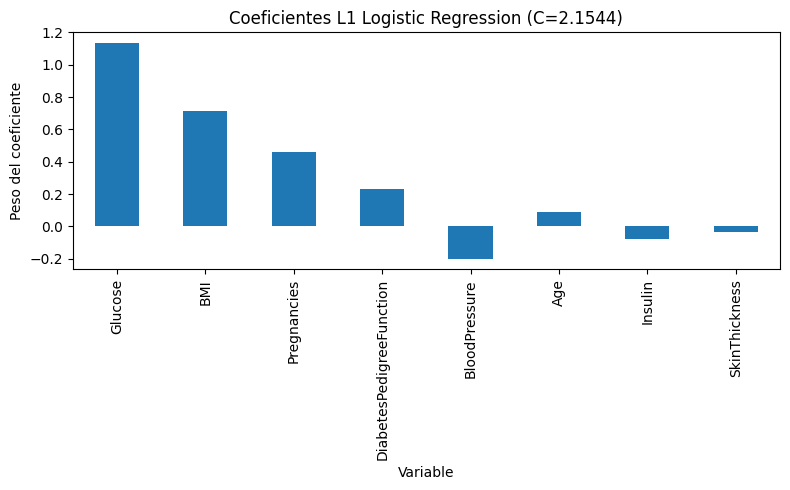

In [76]:
#  Gráfico de barras
coef_filtrado = coef[coef != 0].sort_values(key=abs, ascending=False)

plt.figure(figsize=(8, 5))
coef_filtrado.plot(kind="bar")
plt.title(f"Coeficientes L1 Logistic Regression (C={best_C:.4f})")
plt.ylabel("Peso del coeficiente")
plt.xlabel("Variable")
plt.tight_layout()
plt.show()

## Caso de regresión lineal
Ahora armamos un **experimento controlado** en **regresión lineal** para mostrar cómo **Lasso** y **Ridge** encuentran el mejor `alpha` mediante validación cruzada.

* Generamos un dataset artificial con **3 variables predictoras**:

  * `X1` → **relevante** (explica casi toda la variable objetivo).
  * `X2`, `X3` → **ruido** (no tienen relación con `y`).
* Ajustamos:

  * **LassoCV** → selecciona automáticamente `alpha`.
  * **RidgeCV** → selecciona automáticamente `alpha`.
* Mostramos resultados, alphas y coeficientes estimados.


In [77]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

In [83]:
#  Generar dataset artificial
np.random.seed(42)
n = 100

X1 = np.random.randn(n)          # variable relevante
X2 = np.random.randn(n)          # ruido
X3 = np.random.randn(n)          # ruido

# y depende solo de X1
y = 3 * X1 + np.random.randn(n) * 0.5  # relación lineal con ruido

X = np.vstack([X1, X2, X3]).T
feature_names = ["X1_relevante", "X2_ruido", "X3_ruido"]


In [84]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [87]:
#  LassoCV con pipeline

lasso_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", LassoCV(alphas=np.logspace(-3, 2, 50), cv=5, random_state=42))
])

lasso_pipe.fit(X_train, y_train)
y_pred_lasso = lasso_pipe.predict(X_test)

lasso_model = lasso_pipe.named_steps["lasso"]
print("Mejor alpha (Lasso):", lasso_model.alpha_)
print("Coeficientes Lasso:\n", pd.Series(lasso_model.coef_, index=feature_names))
print("MSE Lasso en test:", round(mean_squared_error(y_test, y_pred_lasso), 3), "\n")

Mejor alpha (Lasso): 0.054286754393238594
Coeficientes Lasso:
 X1_relevante    2.762816
X2_ruido       -0.000000
X3_ruido        0.000000
dtype: float64
MSE Lasso en test: 0.163 



In [89]:
# -----------------------------
# 4) RidgeCV con pipeline
# -----------------------------
ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=np.logspace(-3, 2, 50), cv=5))
])

ridge_pipe.fit(X_train, y_train)
y_pred_ridge = ridge_pipe.predict(X_test)

ridge_model = ridge_pipe.named_steps["ridge"]
print("Mejor alpha (Ridge):", ridge_model.alpha_)
print("Coeficientes Ridge:\n", pd.Series(ridge_model.coef_, index=feature_names))
print("MSE Ridge en test:", round(mean_squared_error(y_test, y_pred_ridge), 3), "\n")

Mejor alpha (Ridge): 0.22229964825261955
Coeficientes Ridge:
 X1_relevante    2.799243
X2_ruido       -0.048291
X3_ruido        0.008767
dtype: float64
MSE Ridge en test: 0.171 



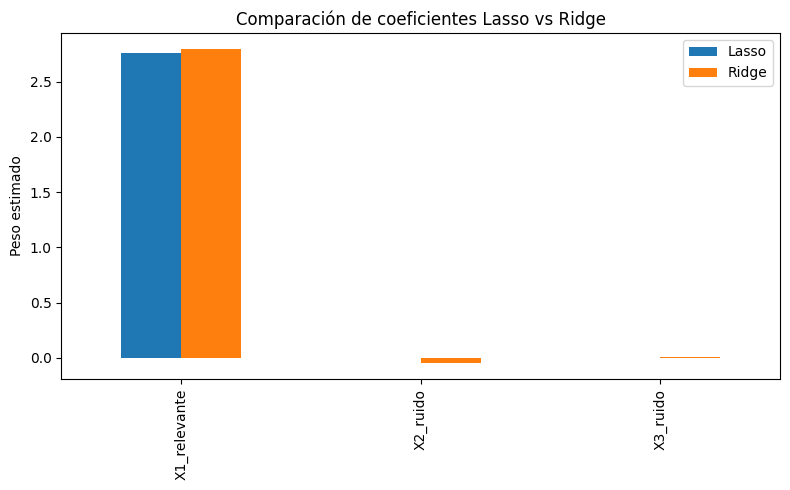

In [90]:
#Visualización de coeficientes
coef_df = pd.DataFrame({
    "Lasso": lasso_model.coef_,
    "Ridge": ridge_model.coef_
}, index=feature_names)

coef_df.plot(kind="bar", figsize=(8,5))
plt.title("Comparación de coeficientes Lasso vs Ridge")
plt.ylabel("Peso estimado")
plt.tight_layout()
plt.show()

* **Datos**: solo `X1` influye en `y`.
* **Lasso** tiende a poner `X2` y `X3` en **cero** (selección de variables).
* **Ridge** mantiene pesos pequeños para `X2` y `X3`, pero rara vez los elimina totalmente.
* Ambos seleccionan el **mejor alpha** con validación cruzada.
* En el gráfico: